In [1]:
#呼叫所需套件
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
# 呼叫CSV檔
data = pd.read_excel("hw2_TEJ_UTF8.xlsx",sheet_name="2498宏達電")
data.head()


,ID,NAME,DATE,Y,M,D,CLOSE,RETURN,Unnamed: 8,Unnamed: 9
0,2498,宏達電,2016/1/4,2016,1,4,79.0,NaN,直接輸入函數,NaN
1,2498,宏達電,2016/1/5,2016,1,5,77.8,-0.015306,宏達電,NaN
2,2498,宏達電,2016/1/6,2016,1,6,76.8,-0.012937,平均數,5.918048e-18
3,2498,宏達電,2016/1/7,2016,1,7,77.0,0.002601,NaN,NaN
4,2498,宏達電,2016/1/8,2016,1,8,77.8,0.010336,中位數,0.000000e+00


In [3]:
#計算報酬率 ln(St/St-1) #範例計算TAIEX與TSMC
data['RETURN']=np.log(data.CLOSE) - np.log(data.CLOSE.shift(1))
# data['TSMC_return']=np.log(data.TSMC_CLOSE) - np.log(data.TSMC_CLOSE.shift(1))
data

,ID,NAME,DATE,Y,M,D,CLOSE,RETURN,Unnamed: 8,Unnamed: 9
0,2498,宏達電,2016/1/4,2016,1,4,79.0,NaN,直接輸入函數,NaN
1,2498,宏達電,2016/1/5,2016,1,5,77.8,-0.015306,宏達電,NaN
2,2498,宏達電,2016/1/6,2016,1,6,76.8,-0.012937,平均數,5.918048e-18
3,2498,宏達電,2016/1/7,2016,1,7,77.0,0.002601,NaN,NaN
4,2498,宏達電,2016/1/8,2016,1,8,77.8,0.010336,中位數,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
239,2498,宏達電,2016/12/26,2016,12,26,78.0,0.010309,NaN,NaN
240,2498,宏達電,2016/12/27,2016,12,27,78.1,0.001281,NaN,NaN
241,2498,宏達電,2016/12/28,2016,12,28,78.3,0.002558,NaN,NaN
242,2498,宏達電,2016/12/29,2016,12,29,77.8,-0.006406,NaN,NaN


# Descriptive Statistics

In [4]:
def descriptive_statistics(x) : 
    return pd.Series([x.mean(),x.median(),x.std(),x.var(),
                      x.kurt(),x.skew(),x.min(),x.max(),x.sum(),
                      x.count(),x.quantile(.25), x.quantile(.75)],index=['mean','median',
                      'std','var','kurtosis','skewness','min','max','sum',
                      'count','25%','75%'])                      

descriptive_statistics_result = pd.DataFrame(data, columns=['RETURN'])
descriptive_statistics_result.apply(descriptive_statistics)

,RETURN
mean,0.000000
median,0.000000
std,0.036106
var,0.001304
kurtosis,1.572220
skewness,0.115705
min,-0.105361
max,0.095310
sum,0.000000
count,243.000000


# 常見的圖形繪製
# (1)直方圖

In [5]:
#呼叫畫圖的套件，利用matplotlib的pyplot.bar功能
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

e:\Anaconda\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
e:\Anaconda\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'TSMC Return Histogram')

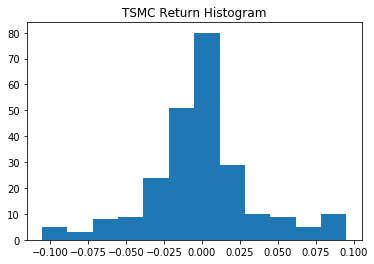

In [8]:
#第一種直方圖 #單一圖形
data.dropna()
plt.hist(data.RETURN,bins=12) 
plt.title("TSMC Return Histogram")
#bins代表直方圖分佈區間個數，range用於設定直方圖的小矩形最大值與最小值

AttributeError: 'DataFrame' object has no attribute 'TAIEX_return'

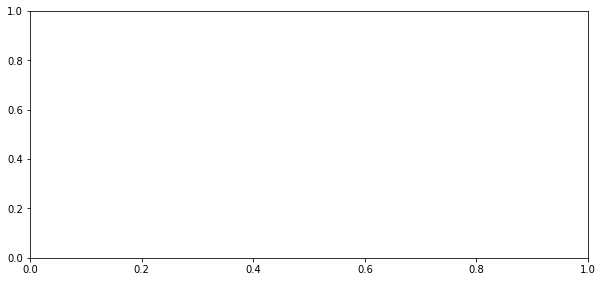

In [7]:
#第二種直方圖 
fig=plt.figure(figsize=(10,10))

#繪製TAIEX_return直方圖
p1=fig.add_subplot(211)
plt.hist(data.TAIEX_return,bins=50,rwidth=0.9)
plt.xlabel('Return')
plt.title("TAIEX Return")

#繪製TSMC_return直方圖
p2=fig.add_subplot(212)
plt.hist(data.TSMC_return,bins=50,rwidth=0.9)
plt.xlabel('Return')
plt.title("TSMC Return")

Text(0.5, 1.0, 'TAIEX and TSMC Return')

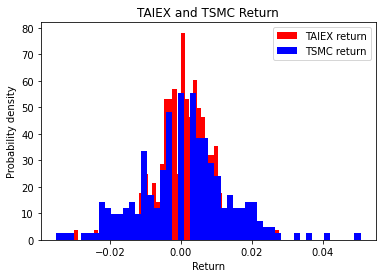

In [ ]:
#第三種直方圖 
plt.hist(data.TAIEX_return,bins=50, density=True,label='TAIEX return',color='r')
plt.hist(data.TSMC_return,bins=50, density=True,label='TSMC return',color='b')

plt.legend()
plt.xlabel('Return')
plt.ylabel('Probability density')
plt.title("TAIEX and TSMC Return")